# Adaboost

## The Data

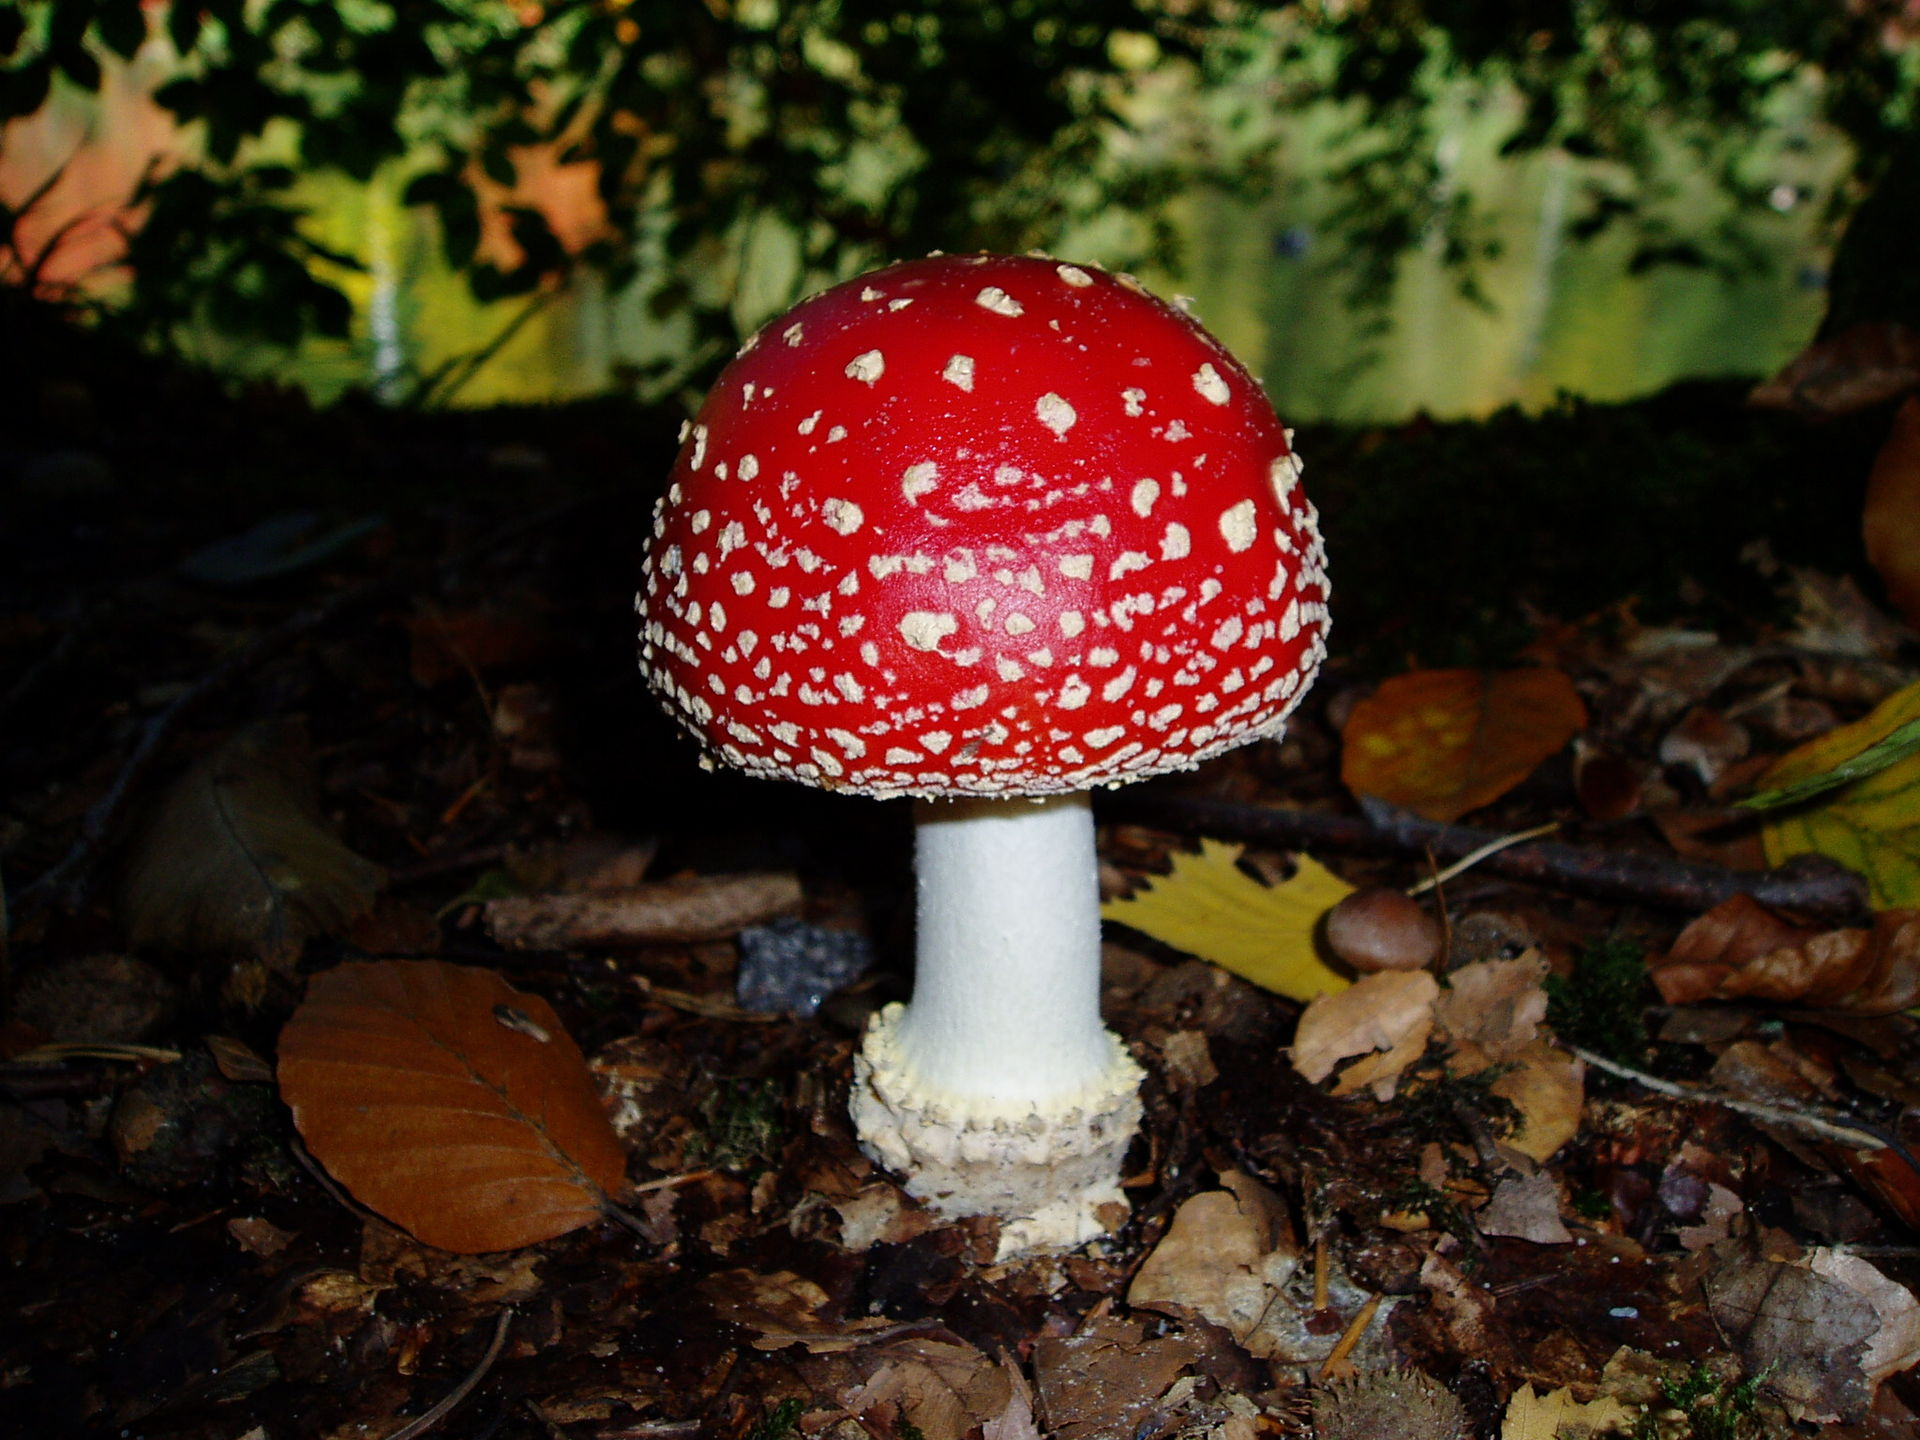

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Goal

**THIS IS IMPORTANT, THIS IS NOT OUR TYPICAL PREDICTIVE MODEL!**

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\18 - Boosting Methods\\31286610-mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA (Exploratory Data Analysis)

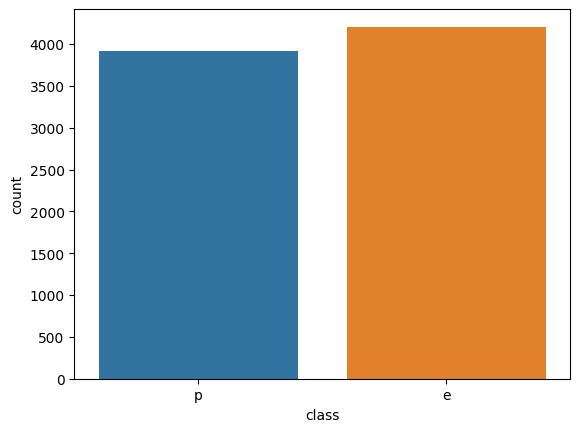

In [6]:
sns.countplot(data=df,x='class');

In [12]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')
feat_uni

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


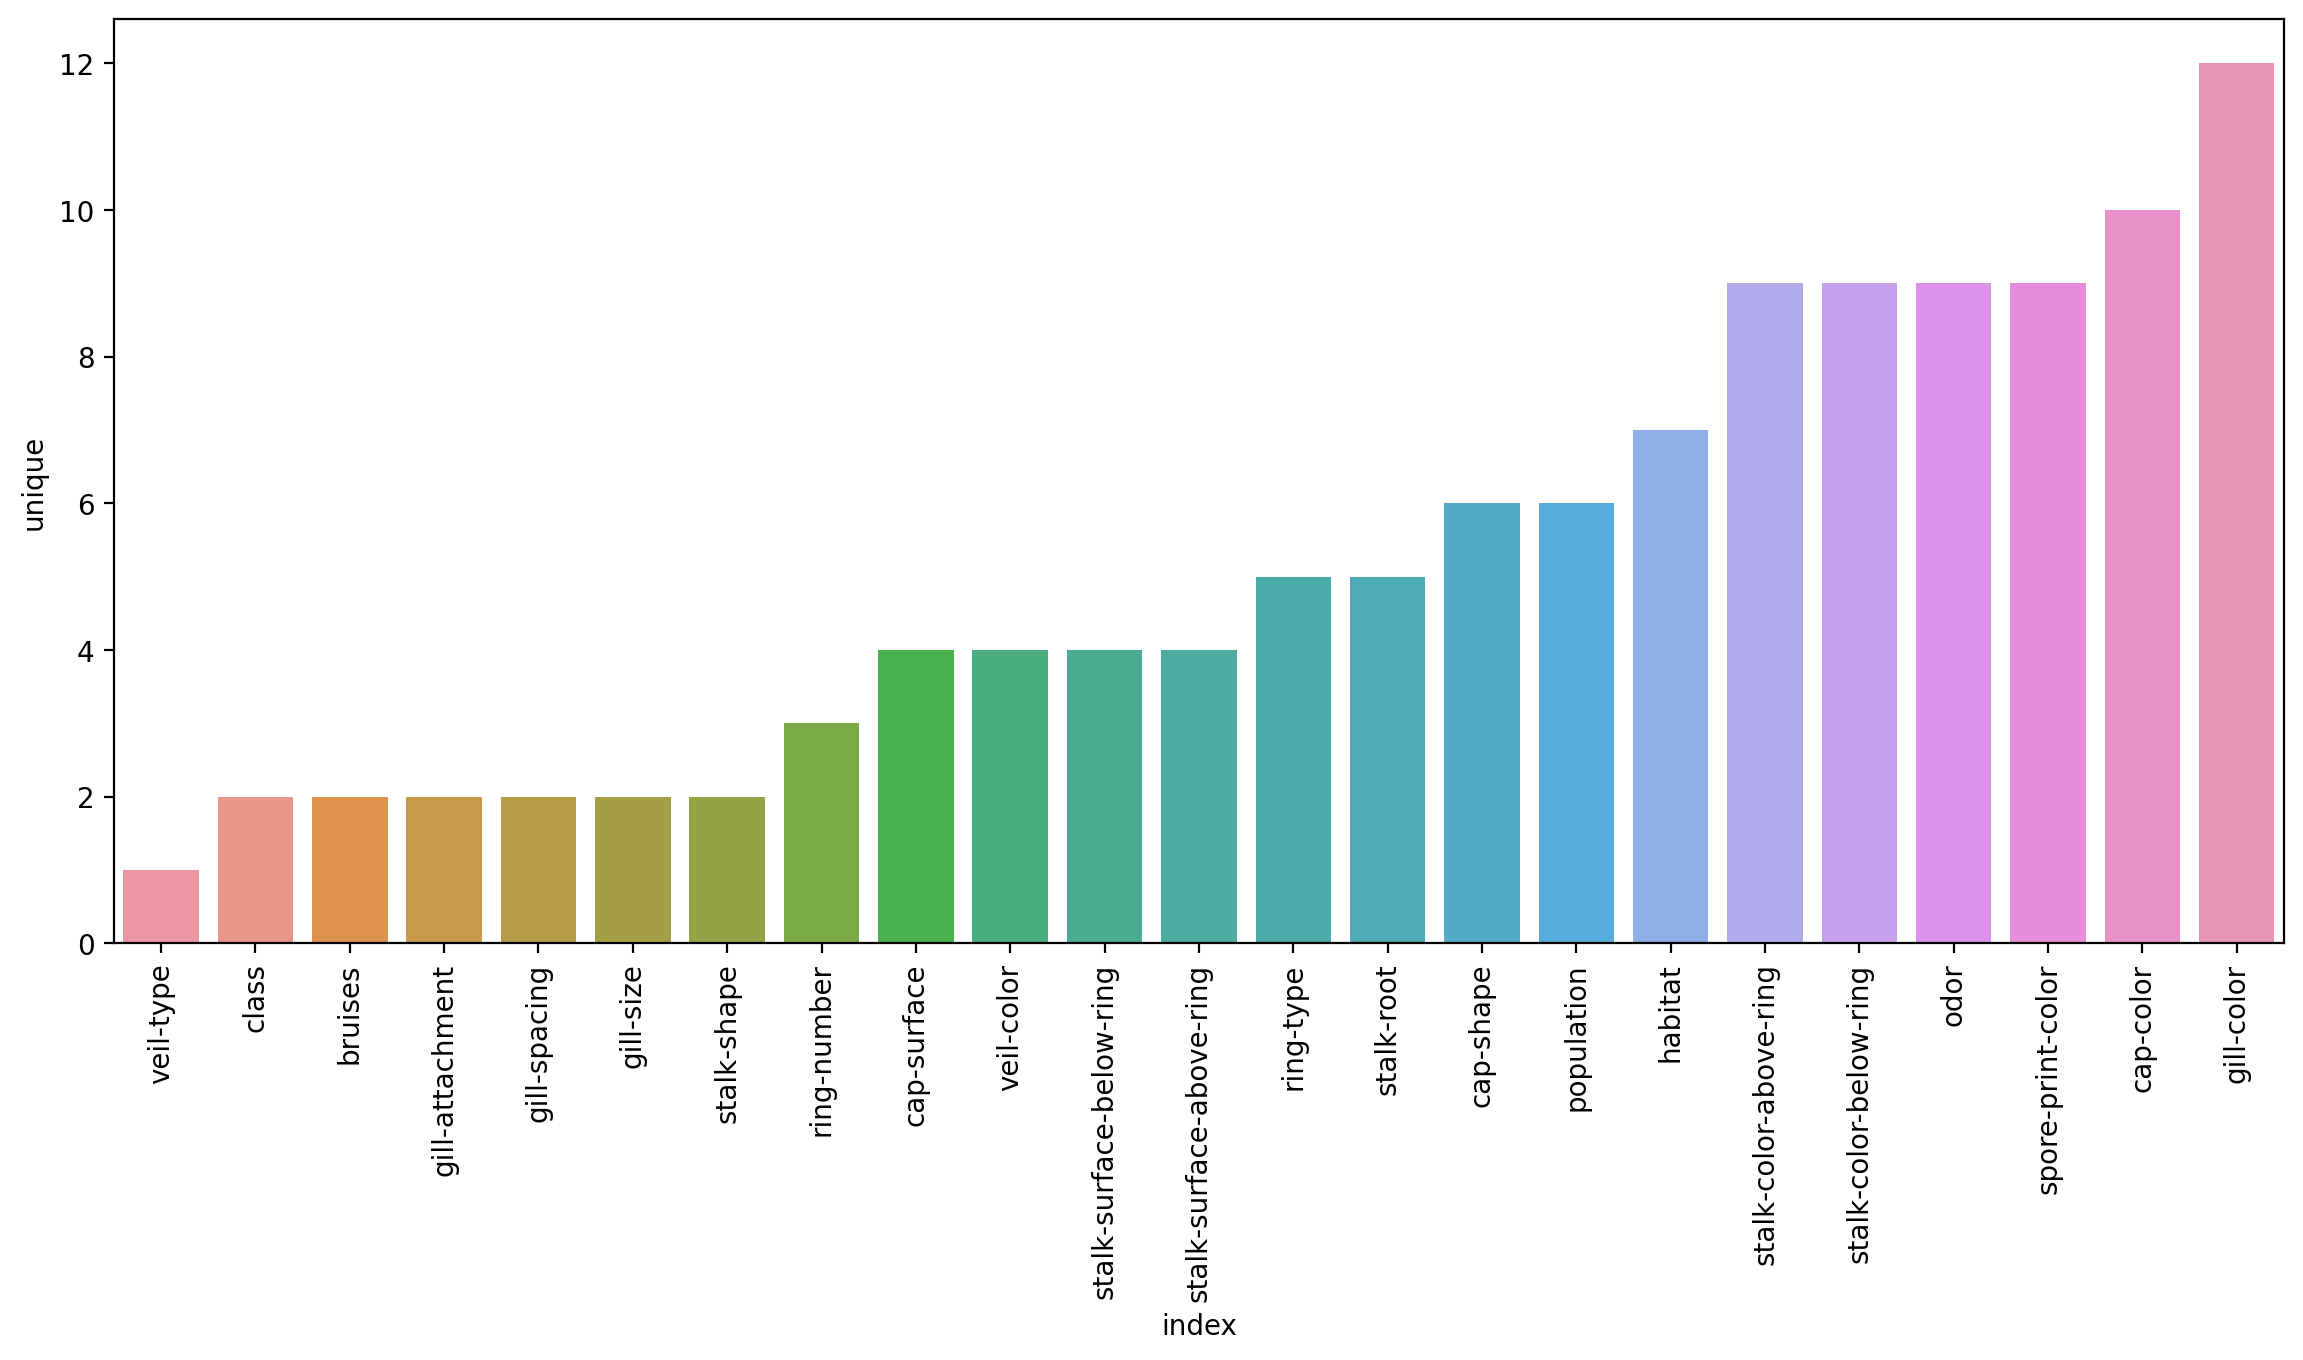

In [16]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(x='index',y='unique',data=feat_uni)
plt.xticks(rotation=90);

In [19]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Train Test Split

In [20]:
X= pd.get_dummies(df.drop('class',axis=1),drop_first=True)

In [22]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
y=df['class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.15,random_state=101)

# Modeling

In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
# Here we set that n_estimators that will take only one feature and all other will be null
model = AdaBoostClassifier(n_estimators=1)

In [48]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [49]:
preds = model.predict(X_test)

## Evaluation

In [50]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [51]:
from mlxtend.plotting import plot_confusion_matrix

In [52]:
m=confusion_matrix(y_test,preds)
m

array([[529, 126],
       [ 23, 541]], dtype=int64)

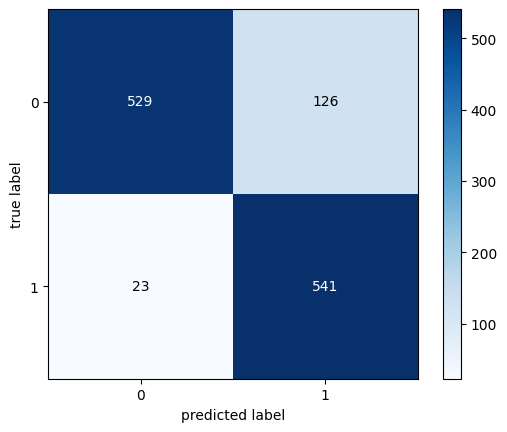

In [53]:
plot_confusion_matrix(m,colorbar=True);

In [54]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [55]:
accuracy_score(y_test,preds)

0.8777686628383922

In [56]:
# Here we can see all feature have 0 importance except one
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
# Here we find that maximum value that is one to know the index id of that 
model.feature_importances_.argmax()

22

In [41]:
# Here is that one feature 
X.columns[22]

'odor_n'

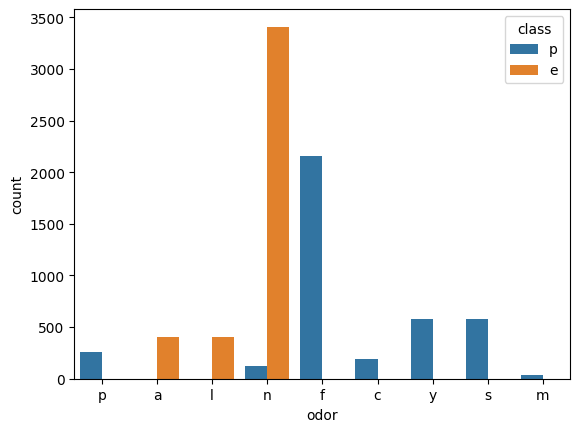

In [44]:
sns.countplot(data=df,x='odor',hue='class');

## Analyzing performance as more weak learners are added.

In [58]:
# Here to total number of columns after applying pd.get_dummies
len(X.columns)

95

now developing model to check total number of features 1 to 95

In [59]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

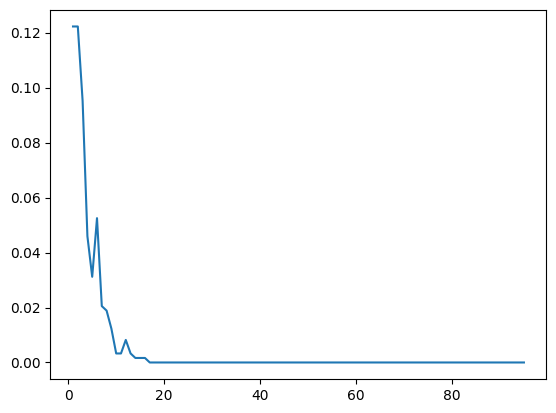

In [62]:
plt.plot(range(1,96),error_rates);

In [63]:
model

AdaBoostClassifier(n_estimators=95)

In [64]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [70]:
feats = pd.DataFrame(index=X.columns , data=model.feature_importances_,columns=['Importance'])
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [72]:
imp_feats = feats[feats['Importance']>0]
imp_feats.sort_values('Importance')

,Importance
cap-color_c,0.010526
ring-number_t,0.010526
stalk-color-below-ring_w,0.010526
stalk-root_b,0.010526
stalk-shape_t,0.010526
habitat_w,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
odor_p,0.021053
odor_c,0.031579


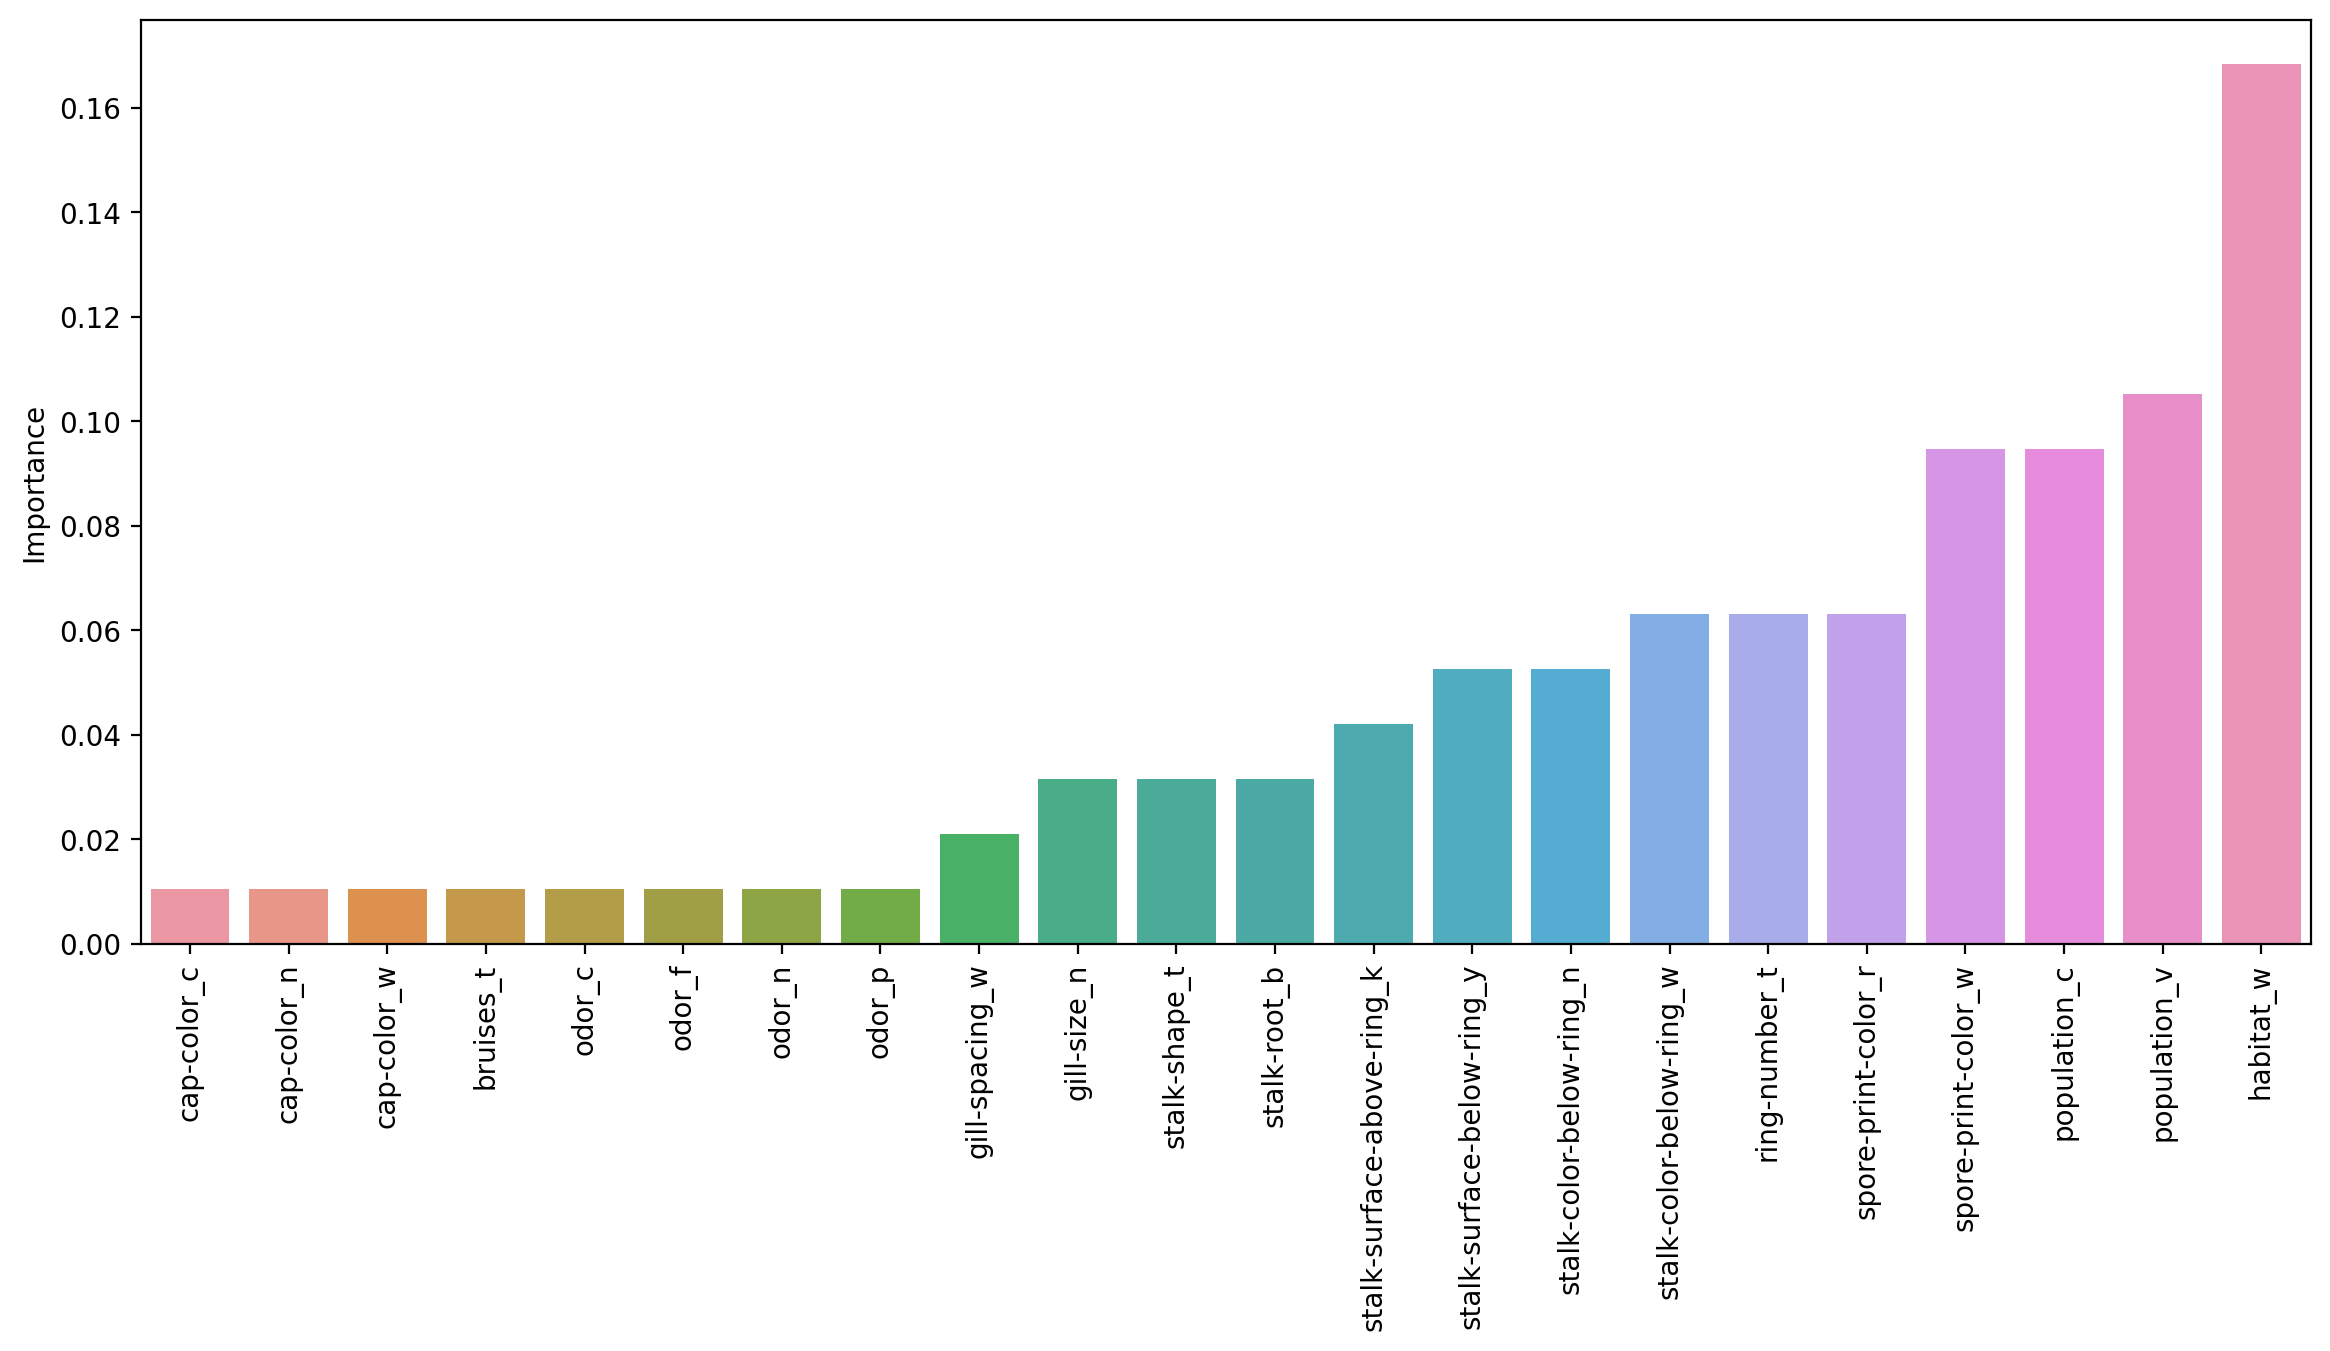

In [75]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

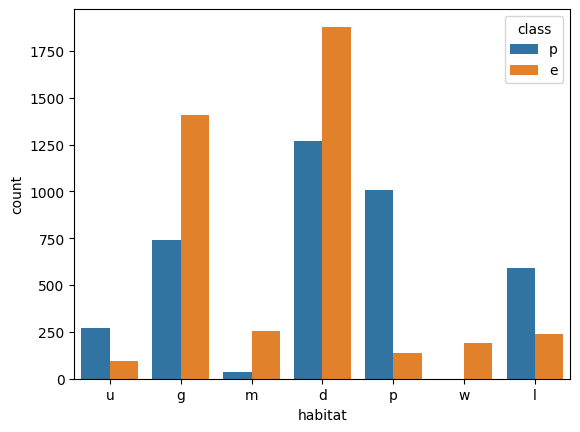

In [76]:
 sns.countplot(data=df,x='habitat',hue='class');

Interesting to see how the importance of the features shift as more are allowed to be added in! But remember these are all weak learner stumps, and feature importance is available for all the tree methods!

# Gradient Boosting and GridSearch

In [117]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [118]:
X = df.drop('class',axis=1)
y = df['class']

In [119]:
X = pd.get_dummies(X,drop_first=True)

In [120]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## Train Test Split

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=101)

## Gradient Boosting and Grid Search with CV

In [124]:
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
#help(GradientBoostingClassifier)

In [126]:
from sklearn.model_selection import GridSearchCV

In [135]:
param_grid = {'n_estimators':[1,5,10,20,40,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5,6]}

In [136]:
gb_model = GradientBoostingClassifier()

In [137]:
grid = GridSearchCV(gb_model,param_grid)

### Fit to Training Data with CV Search

In [138]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [139]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

## Performance

In [140]:
from sklearn.metrics import classification_report,accuracy_score

In [141]:
from mlxtend.plotting import plot_confusion_matrix

In [142]:
preds = grid.predict(X_test)

In [143]:
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [144]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [145]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.35156614e-16, 0.00000000e+00, 0.00000000e+00,
       7.85087530e-17, 1.04524302e-03, 5.93230609e-18, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 1.66104383e-17, 0.00000000e+00,
       3.79992913e-17, 0.00000000e+00, 0.00000000e+00, 1.66230685e-08,
       2.38800034e-03, 5.23897091e-02, 6.24175887e-04, 1.01346784e-02,
       1.82499853e-02, 1.23525717e-05, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25278108e-02,
       1.06871727e-02, 0.00000000e+00, 1.62087258e-16, 4.11091114e-18,
       7.44589338e-18, 0.00000000e+00, 0.00000000e+00, 1.74744598e-17,
       2.95645628e-17, 0.00000000e+00, 6.24729829e-18, 0.00000000e+00,
       2.03408198e-04, 0.00000000e+00, 1.35980705e-01, 7.71855052e-03,
       5.39517537e-02, 4.64723214e-04, 2.59824622e-04, 4.95063766e-06,
       1.83319493e-05, 1.35380870e-07, 1.23189646e-02, 1.45243645e-04,
       0.00000000e+00, 0.00000000e+00, 3.91530504e-04, 0.00000000e+00,
      

In [146]:
imp_feats = pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,2.351566e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,7.850875e-17
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [147]:
imp_feats.sort_values('Importance',ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135981
stalk-root_r,0.053952
bruises_t,0.052390
spore-print-color_r,0.030495
...,...
veil-color_o,0.000000
veil-color_w,0.000000
gill-color_y,0.000000
odor_y,0.000000


In [148]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064707,0.0,0.0,2.351566e-16,0.000555,0.614744


In [149]:
imp_feats = imp_feats[imp_feats['Importance']>0.000587]

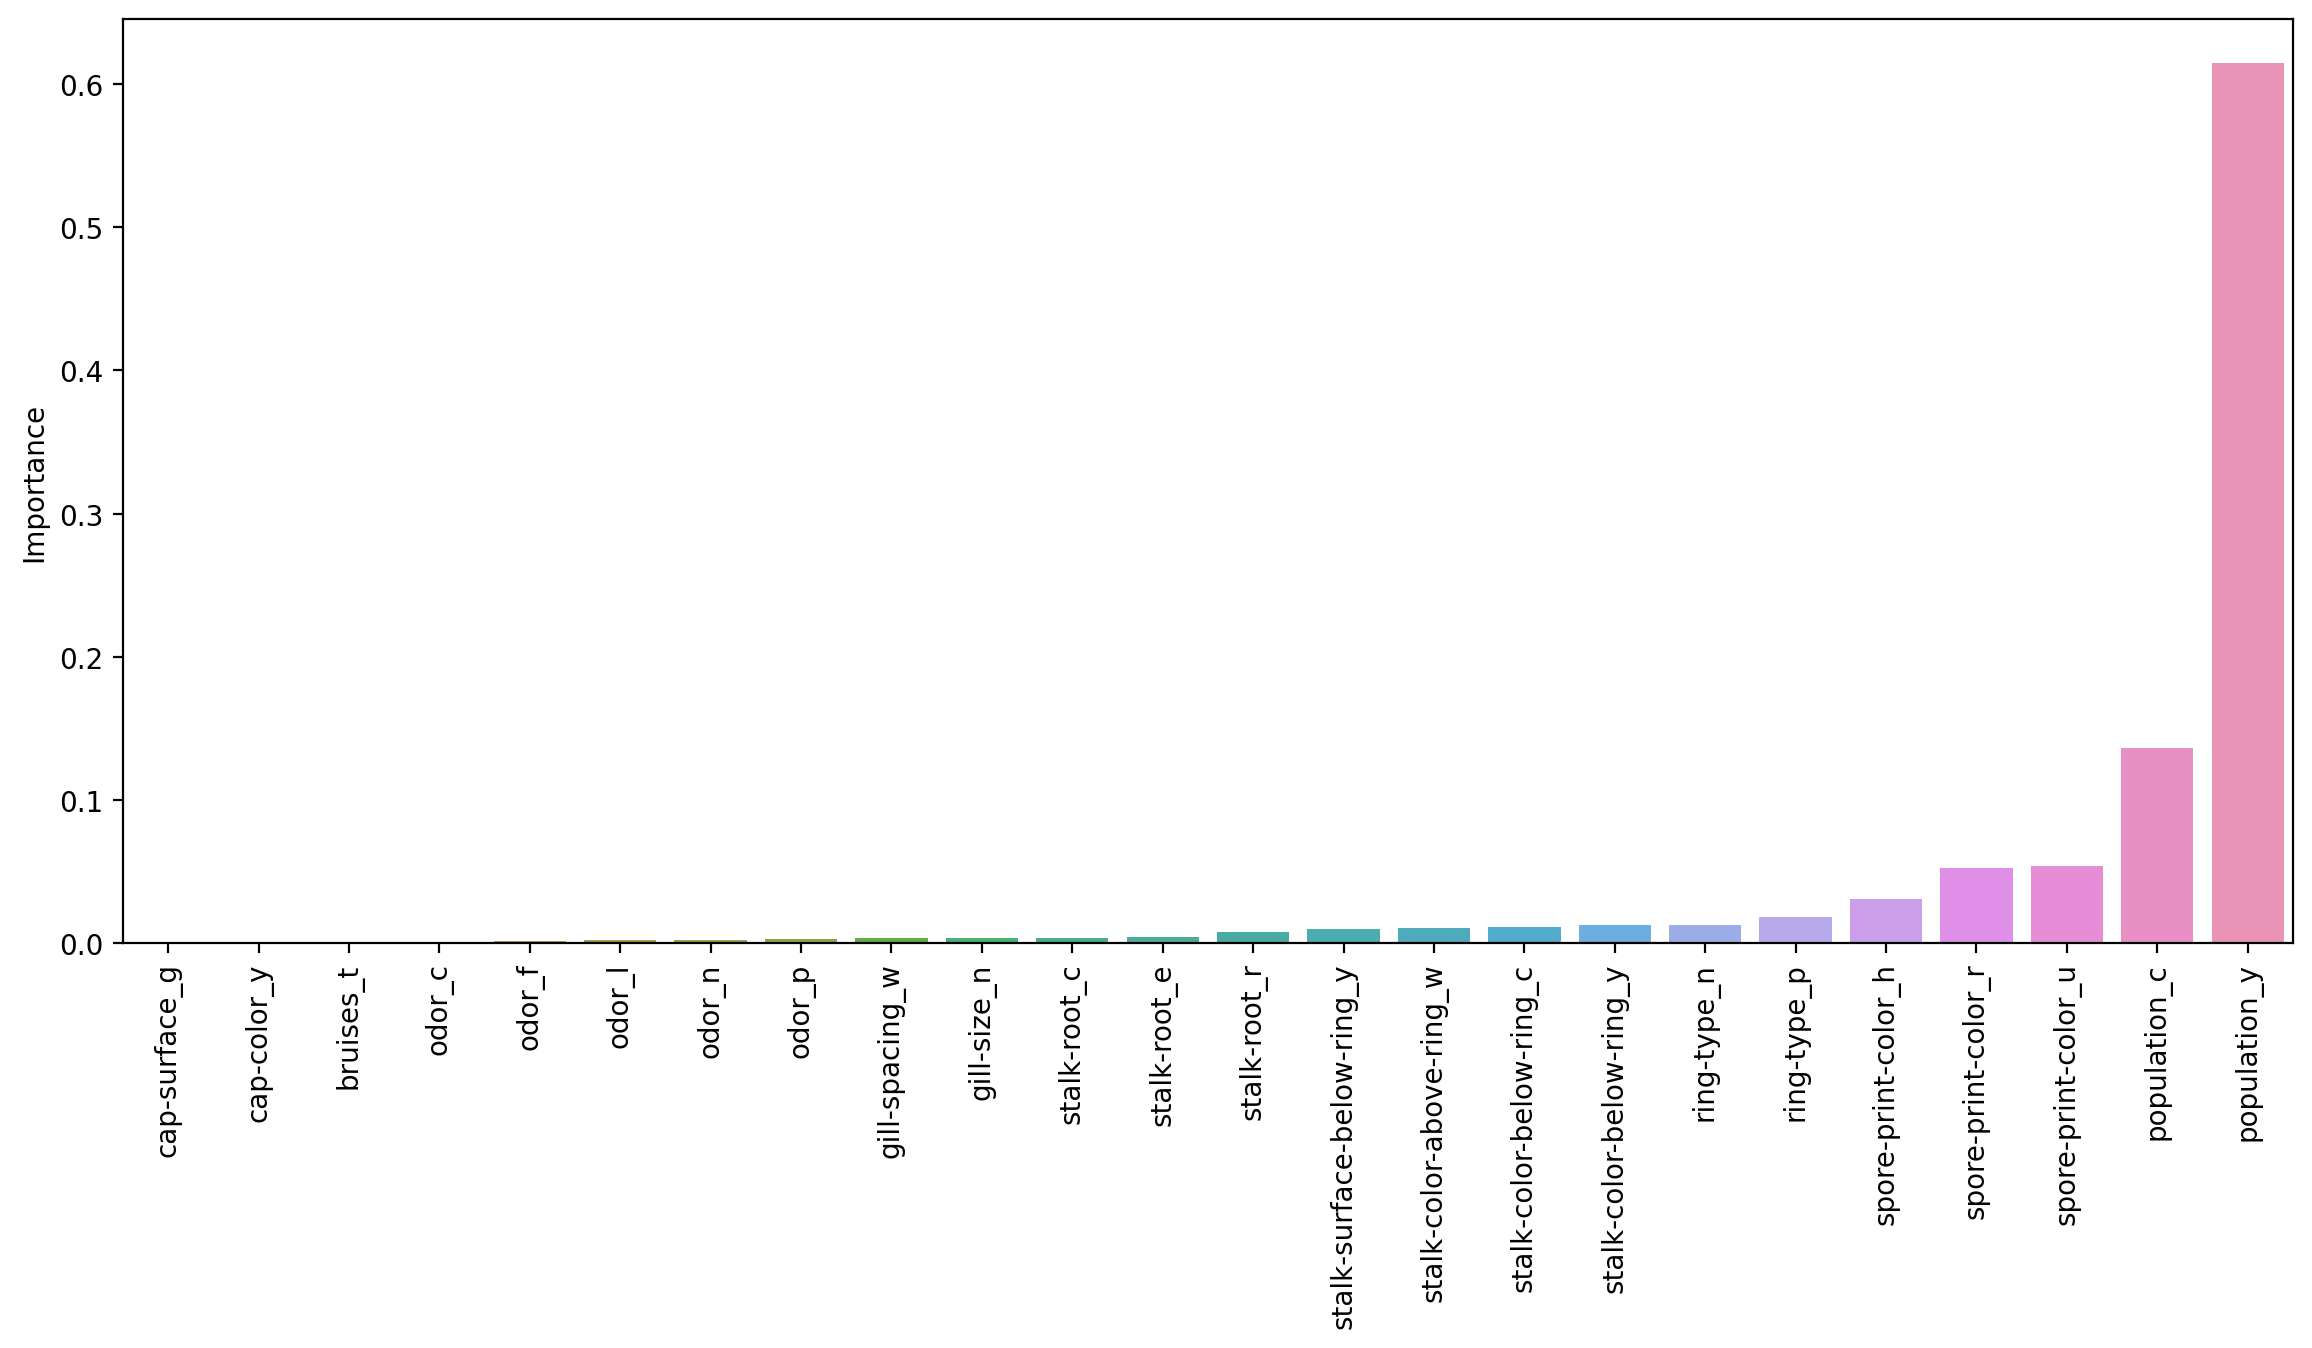

In [150]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);